In [ ]:
import os
import pickle
from tqdm.notebook import tqdm

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

In [ ]:
# od.download("https://www.kaggle.com/datasets/saifsust/bancap/data")

In [ ]:
od.download("https://www.kaggle.com/datasets/adityajn105/flickr8k/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sameershafayetlatif
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k


100%|██████████| 1.04G/1.04G [00:54<00:00, 20.4MB/s]


In [ ]:
BASE_DIR = '/content/flickr8k'

In [ ]:
image_path = "/content/flickr8k/Images"
data = pd.read_csv("/content/flickr8k/bancap.csv")
jpgs = os.listdir(image_path)
print("Total Images in Dataset = {}".format(len(jpgs)))
print(type(data))
data

Total Images in Dataset = 8091
<class 'pandas.core.frame.DataFrame'>


image  repeat  \
0      1000268201_693b08cb0e.jpg       0   
1      1000268201_693b08cb0e.jpg       1   
2      1000268201_693b08cb0e.jpg       2   
3      1000268201_693b08cb0e.jpg       3   
4      1000268201_693b08cb0e.jpg       4   
...                          ...     ...   
40450   997722733_0cb5439472.jpg       0   
40451   997722733_0cb5439472.jpg       1   
40452   997722733_0cb5439472.jpg       2   
40453   997722733_0cb5439472.jpg       3   
40454   997722733_0cb5439472.jpg       4   

                                         english_caption  \
0      A child in a pink dress is climbing up a set o...   
1                  A girl going into a wooden building .   
2       A little girl climbing into a wooden playhouse .   
3      A little girl climbing the stairs to her playh...   
4      A little girl in a pink dress going into a woo...   
...                                                  ...   
40450           A man in a pink shirt climbs a rock face   
40451           A man is rock climbing high in the air .   
40452  A person in a red shirt climbing up a rock fac...   
40453                    A rock climber in a red shirt .   
40454  A rock climber practices on a rock climbing wa...   

                                                 caption  
0      একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্...  
1                 একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে  
2                    একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে   
3               ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে  
4      গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি...  
...                                                  ...  
40450     গোলাপী শার্টের একটি লোক একটি শিলার উপরে উঠেছিল  
40451                    একজন মানুষ পাথরে চড়ছে অনেক উপরে  
40452  লাল শার্টের একজন ব্যক্তি সহায়তার হাতলগুলিতে ঢ...  
40453                           লাল শার্টে একটি রক আরোহী  
40454  একটি রক আরোহী একটি শৈল আরোহণ প্রাচীর এর উপর অন...  

[40455 rows x 4 columns]

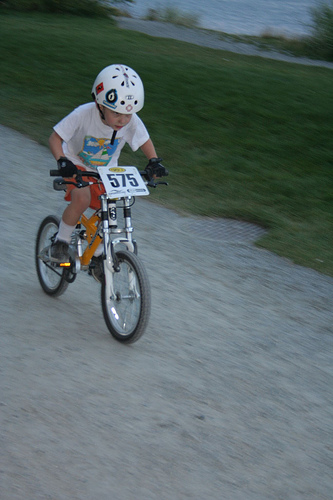

In [ ]:
from IPython.display import Image
Image('/content/flickr8k/Images/1075716537_62105738b4.jpg')

In [ ]:
# data['caption_id']=data['caption_id'].str[:-2]

In [ ]:
# data['caption_id']

In [ ]:
data=data.drop('english_caption',axis=1)

In [ ]:
data.rename(columns = {'caption_id':'image','bengali_caption':'caption'}, inplace = True)

In [ ]:
data

image  repeat  \
0      1000268201_693b08cb0e.jpg       0   
1      1000268201_693b08cb0e.jpg       1   
2      1000268201_693b08cb0e.jpg       2   
3      1000268201_693b08cb0e.jpg       3   
4      1000268201_693b08cb0e.jpg       4   
...                          ...     ...   
40450   997722733_0cb5439472.jpg       0   
40451   997722733_0cb5439472.jpg       1   
40452   997722733_0cb5439472.jpg       2   
40453   997722733_0cb5439472.jpg       3   
40454   997722733_0cb5439472.jpg       4   

                                                 caption  
0      একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্...  
1                 একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে  
2                    একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে   
3               ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে  
4      গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি...  
...                                                  ...  
40450     গোলাপী শার্টের একটি লোক একটি শিলার উপরে উঠেছিল  
40451                    একজন মানুষ পাথরে চড়ছে অনেক উপরে  
40452  লাল শার্টের একজন ব্যক্তি সহায়তার হাতলগুলিতে ঢ...  
40453                           লাল শার্টে একটি রক আরোহী  
40454  একটি রক আরোহী একটি শৈল আরোহণ প্রাচীর এর উপর অন...  

[40455 rows x 3 columns]

In [ ]:
# load vgg19 model
model = VGG19()
# restructure the model
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
# summarize
print(model.summary())

574710816/574710816 [==============================] - 31s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'Images')

for img_name in tqdm(os.listdir(directory)):
    #load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size = (224, 224))
    # convert img pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    feature = model.predict(image, verbose = 0)
    # get image id
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

# Verify the number of extracted features
print("Number of images with extracted features:", len(features))

  0%|          | 0/8091 [00:00<?, ?it/s]

Number of images with extracted features: 8091


In [ ]:
WORKING_DIR = '/content/working/'
if not os.path.exists(WORKING_DIR):
    os.makedirs(WORKING_DIR)
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [ ]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
BANCAP_DIR = '/content/flickr8k/'
if not os.path.exists(BANCAP_DIR):
    os.makedirs(BANCAP_DIR)
with open(os.path.join(BANCAP_DIR, 'bancap.csv'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
captions_doc

'1000268201_693b08cb0e.jpg,0,A child in a pink dress is climbing up a set of stairs in an entry way .,একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্রবেশ পথের সিঁড়ি বেয়ে উঠছে\n1000268201_693b08cb0e.jpg,1,A girl going into a wooden building .,একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে\n1000268201_693b08cb0e.jpg,2,A little girl climbing into a wooden playhouse .,একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে \n1000268201_693b08cb0e.jpg,3,A little girl climbing the stairs to her playhouse .,ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে\n1000268201_693b08cb0e.jpg,4,A little girl in a pink dress going into a wooden cabin .,গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি ঘরে প্রবেশ করছে\n1001773457_577c3a7d70.jpg,0,A black dog and a spotted dog are fighting,একটি কালো কুকুর এবং একটি ছোপওয়ালা কুকুর ঝগড়া করছে\n1001773457_577c3a7d70.jpg,1,A black dog and a tri-colored dog playing with each other on the road .,একটি কালো কুকুর একটি তিন রঙা কুকুরের সাথে রাস্তায় খেলছে\n1001773457_577c3a7d70.jpg,2,A black dog and a white d

In [ ]:
mapping = {}
#process lines
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    image_id = tokens[0]
    if len(line) < 2:
        continue
    caption =  tokens[3:]
    #remove extensions from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    #store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40455 [00:00<?, ?it/s]

In [ ]:
len(mapping)

8091

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            #take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # caption = caption.lower()
            # replace digits, special characters
            caption = caption.replace('[^\u0980-\u09FF]', '')
            #delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
mapping['1000268201_693b08cb0e']

['একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্রবেশ পথের সিঁড়ি বেয়ে উঠছে',
 'একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে',
 'একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে ',
 'ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে',
 'গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি ঘরে প্রবেশ করছে']

In [ ]:
# preprocess the text
clean(mapping)

In [ ]:
#after preprocess of text
mapping['1000268201_693b08cb0e']

['startseq একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্রবেশ পথের সিঁড়ি বেয়ে উঠছে endseq',
 'startseq একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে endseq',
 'startseq একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে endseq',
 'startseq ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে endseq',
 'startseq গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি ঘরে প্রবেশ করছে endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40455

In [ ]:
all_captions[:10]

['startseq একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্রবেশ পথের সিঁড়ি বেয়ে উঠছে endseq',
 'startseq একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে endseq',
 'startseq একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে endseq',
 'startseq ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে endseq',
 'startseq গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি ঘরে প্রবেশ করছে endseq',
 'startseq একটি কালো কুকুর এবং একটি ছোপওয়ালা কুকুর ঝগড়া করছে endseq',
 'startseq একটি কালো কুকুর একটি তিন রঙা কুকুরের সাথে রাস্তায় খেলছে endseq',
 'startseq একটি কালো কুকুর একটি সাদা-বাদামি ছোপযুক্ত কুকুর রাস্তায় একে অপরের দিকে তাকিয়ে আছে endseq',
 'startseq ভিন্ন জাতের দুটি কুকুর রাস্তায় একে অপরের দিকে তাকিয়ে আছে endseq',
 'startseq রাস্তার পাশে দুইটি কুকুর পরস্পরের দিকে এগিয়ে যাচ্ছ endseq']

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

17757

In [ ]:
# get maximum lenth of the caption
max_length = max(len(caption.split()) for caption in all_captions)
max_length

48

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
split
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
# create data generator to get data in batch (avoid session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1,X2,y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n +=1
            captions = mapping[key]
            #process each caption
            for caption in captions:
                #encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X,y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq,out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen= max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes = vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n==batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

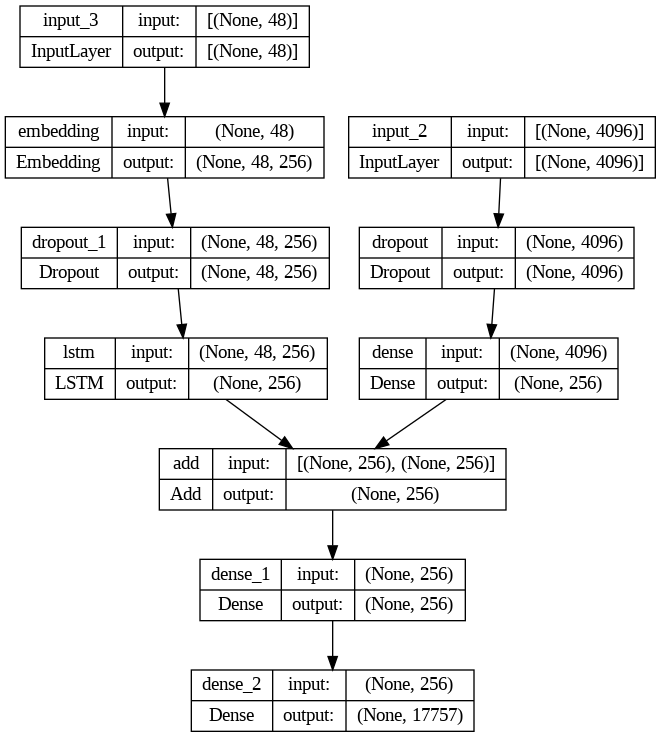

In [ ]:
# image feature layers
inputs1 = Input(shape = (4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation = 'relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero = True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation = 'relu')(decoder1)
outputs = Dense(vocab_size, activation = 'softmax')(decoder2)

model = Model(inputs= [inputs1, inputs2], outputs= outputs)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

#plot the model
plot_model(model, show_shapes= True)

In [ ]:
# train the model
epochs = 15
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch = steps, verbose = 1)

227/227 [==============================] - 83s 364ms/step - loss: 2.7373


In [ ]:
# save the model
model.save(WORKING_DIR+'/best_model_proto.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model weights
model.save_weights('model.h5')

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose = 0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        #append word as input for generating next word
        in_text += " "+word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu

# validate with text data
actual, predicted = list(), list()
for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)


# Calculate BLEU score
print("BLEU-1: %f" %corpus_bleu(actual, predicted, weights= (1.0, 0, 0, 0)))
print("BLEU-2: %f" %corpus_bleu(actual, predicted, weights= (0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.514597
BLEU-2: 0.308784


In [ ]:
!git clone https://github.com/google-research/google-research.git

Cloning into 'google-research'...
remote: Enumerating objects: 88131, done.
remote: Counting objects: 100% (1230/1230), done.
remote: Compressing objects: 100% (985/985), done.
remote: Total 88131 (delta 341), reused 1096 (delta 230), pack-reused 86901
Receiving objects: 100% (88131/88131), 615.10 MiB | 14.39 MiB/s, done.
Resolving deltas: 100% (55557/55557), done.
Updating files: 100% (19648/19648), done.


In [ ]:
%cd google-research

/content/google-research


In [ ]:
%cd rouge

/content/google-research/rouge


In [ ]:
!pip install -r requirements.txt
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=9037e91f92e763058b028a40383399981b926260feed098a82ac157f0fda459f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer
from tqdm import tqdm

In [ ]:
actual[:2]

[[['startseq', 'একজন', 'লোক', 'লাল', 'দালানটিতে', 'প্রবেশ', 'করছে', 'endseq'],
  ['startseq',
   'ভবনের',
   'ঠিক',
   'পাশ',
   'দিয়ে',
   'এক',
   'লোক',
   'হেটে',
   'যাচ্ছে',
   'endseq'],
  ['startseq',
   'একটি',
   'লোক',
   'একটি',
   'জাল',
   'রকেট',
   'সংযুক্ত',
   'লাল',
   'ভবন',
   'পার',
   'করে',
   'হেঁটে',
   'চলেছে',
   'endseq'],
  ['startseq',
   'একজন',
   'লোক',
   'একটি',
   'বিশাল',
   'রকেট',
   'আকৃতির',
   'ভাস্কর্য',
   'খচিত',
   'দালানের',
   'নিচ',
   'দিয়ে',
   'হেটে',
   'যায়',
   'endseq'],
  ['startseq', 'একলোক', 'হাঁটছে', 'endseq']],
 [['startseq',
   'একটি',
   'বাদামি',
   'ডোবারম্যান',
   'জাতের',
   'কুকুর',
   'মুখের',
   'মধ্যে',
   'একটি',
   'লাঠি',
   'ধরে',
   'রেখেছে',
   'endseq'],
  ['startseq',
   'একটি',
   'কুকুর',
   'মুখে',
   'গাছের',
   'ডাল',
   'কামড়ে',
   'আছে',
   'endseq'],
  ['startseq', 'একটি', 'কুকুর', 'লাঠি', 'কামড়ায়', 'endseq'],
  ['startseq', 'একটি', 'কুকুর', 'পল্লব', 'কামড়াচ্ছে', 'endseq'],
  ['startseq', 'একটি', 

In [ ]:
predicted[:2]

[['startseq',
  'একজন',
  'লোক',
  'একটি',
  'বারান্দা',
  'এর',
  'সামনে',
  'দাঁড়িয়ে',
  'আছে',
  'endseq'],
 ['startseq',
  'একটি',
  'কুকুর',
  'একটি',
  'বাধ',
  'থেকে',
  'লাফ',
  'দিচ্ছে',
  'endseq']]

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.1 M

In [ ]:
import gradio as gr
from PIL import Image
import numpy as np

In [ ]:
# Define a function to preprocess the uploaded image
def preprocess_image(image):

    # Convert the image to numpy array
    image = np.array(image)
    # Resize the image to match the expected input size of your model
    # For example, if your model expects images of size (224, 224):
    image = Image.fromarray(image).resize((224, 224))
    # Perform any other preprocessing steps (e.g., normalization)
    # Return the preprocessed image
    return image

In [ ]:

model34 = VGG19()
# restructure the model
model34 = Model(inputs = model34.inputs, outputs = model34.layers[-2].output)

def feature_image(pil_image):

#load the image from file
    # img_path = directory + '/' + img_name
    # image = load_img(img_path, target_size = (224, 224))

    target_size = (224, 224)  # or whatever your model expects
    image = pil_image.resize(target_size)

    # convert img pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = np.expand_dims(image, axis=0)

    # preprocess image for vgg
    feature = model34.predict(image, verbose = 0)
    return feature

In [ ]:
# Define the Gradio interface
inputs = gr.Image(type="pil", label="Upload Image")
outputs = gr.Textbox(label="Generated Caption")

# Define a function to generate a caption for the uploaded image
def generate_caption(image):
    # Preprocess the uploaded image
    features = feature_image(image)
    # Generate a caption for the image using your model
    caption = predict_caption(model, features, tokenizer, max_length)
    # Return the generated caption
    return caption

# Create and launch the Gradio app
gr.Interface(
    fn=generate_caption,
    inputs=inputs,
    outputs=outputs,
    title="Bangla Image Captioning",
    description="Upload an image and get a caption in Bangla!"
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bc20f4d8275dd0ce62.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# !pip install gradio
# !pip install flask-ngrok
# !pip install tensorflow keras

In [ ]:
# import gradio as gr
# from PIL import Image
# import numpy as np
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.image import img_to_array
# from flask import Flask, render_template_string
# from flask_ngrok import run_with_ngrok

# # Define a function to preprocess the uploaded image
# def preprocess_image(image):
#     # Convert the image to numpy array
#     image = np.array(image)
#     # Resize the image to match the expected input size of your model
#     # For example, if your model expects images of size (224, 224):
#     image = Image.fromarray(image).resize((224, 224))
#     # Perform any other preprocessing steps (e.g., normalization)
#     # Return the preprocessed image
#     return image

# # Load and restructure the model
# model34 = VGG16()
# model34 = Model(inputs=model34.inputs, outputs=model34.layers[-2].output)

# def feature_image(pil_image):
#     target_size = (224, 224)  # or whatever your model expects
#     image = pil_image.resize(target_size)
#     # Convert img pixels to numpy array
#     image = img_to_array(image)
#     # Reshape data for model
#     image = np.expand_dims(image, axis=0)
#     # Preprocess image for VGG
#     feature = model34.predict(image, verbose=0)
#     return feature

# # Define a function to generate a caption for the uploaded image
# def generate_caption(image):
#     # Preprocess the uploaded image
#     features = feature_image(image)
#     # Generate a caption for the image using your model
#     # Here you need to define your 'predict_caption' function and load the tokenizer, model, and max_length
#     caption = predict_caption(model, features, tokenizer, max_length)
#     # Return the generated caption
#     return caption

# # Define the Gradio interface
# gradio_interface = gr.Interface(
#     fn=generate_caption,
#     inputs=gr.Image(type="pil", label="Upload Image"),
#     outputs=gr.Textbox(label="Generated Caption"),
#     title="Bangla Image Captioning",
#     description="Upload an image and get a caption in Bangla!"
# )

# # Flask app
# app = Flask(__name__)
# run_with_ngrok(app)

# @app.route('/')
# def home():
#     return render_template_string("""
#         <!DOCTYPE html>
#         <html lang="en">
#         <head>
#             <meta charset="UTF-8">
#             <meta name="viewport" content="width=device-width, initial-scale=1.0">
#             <title>Bangla Image Captioning</title>
#         </head>
#         <body>
#             <h1>Bangla Image Captioning</h1>
#             <iframe src="/gradio" width="100%" height="600px"></iframe>
#         </body>
#         </html>
#     """)

# @app.route('/gradio')
# def gradio():
#     return gradio_interface.launch(share=True, inline=True)

# if __name__ == '__main__':
#     app.run()


In [ ]:
# inputs = gr.Image(type="pil", label="Upload Image")
# outputs = gr.Textbox(label="Generated Caption")

# # Define a function to generate a caption for the uploaded image
# def generate_caption(image):
#     # Preprocess the uploaded image
#     features = feature_image(image)
#     # Generate a caption for the image using your model
#     caption = predict_caption(model, features, tokenizer, max_length)
#     # Return the generated caption
#     return caption

# # Create and launch the Gradio app
# gr.Interface(
#     fn=generate_caption,
#     inputs=inputs,
#     outputs=outputs,
#     title="Bangla Image Captioning",
#     description="Upload an image and get a caption in Bangla!"
# ).launch()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------------Actual--------------------------')
    for caption in captions:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------------Predicted------------------------')
    print(y_pred)
    plt.imshow(image)

---------------------------Actual--------------------------
startseq একটি কালো বাদামি ছোপযুক্ত কুকুর একটি খেলনা ধরার জন্য শূণ্যে লাফাচ্ছে endseq
startseq একটি সাদাকালো রঙের কুকুর একটি হলুদ খেলনার দিকে লাফ দিলো endseq
startseq বল ধরার জন্য একটি কুকুর মাঠে লাফালাফি করছে endseq
startseq ঘাসের মাঠের উপর একটি সাদা কুকুর শুন্যে থাকা একটি বল ধরার চেষ্টা করছে endseq
startseq সাদা কুকুরটি হলুদ খেলনা নিয়ে সবুজ মাঠে খেলছে endseq
--------------------------Predicted------------------------
startseq একটি কুকুর বল ধরার জন্য শূন্যে লাফ দিচ্ছে endseq


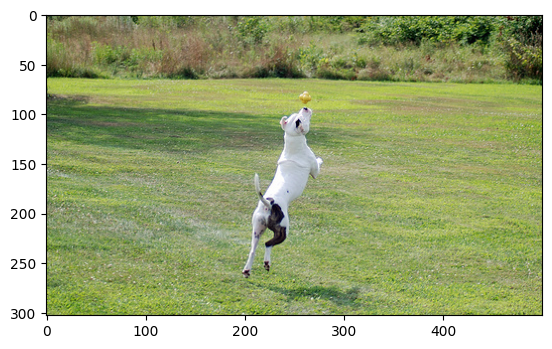

In [ ]:
generate_caption("1020651753_06077ec457.jpg")

---------------------------Actual--------------------------
startseq একজন লোক একটি শিশু ক্যানভাসে মোড়ানো ছইওয়ালা ছোট সরু নৌকায় করে পানির উপর ভেসে বেড়াচ্ছে endseq
startseq একজন লোক এবং ছোট ছেলে নীল রঙের বহিরাবরণ পরে একটি হ্রদে ডোঙ্গা বেয়ে যাচ্ছে endseq
startseq একজন পুরুষ এবং শিশু শান্ত পানিতে কায়াকিং করছে endseq
startseq একজন পুরুষ এবং একটি বাচ্চা পানিতে নৌকা বাইছে endseq
startseq ক্যানভাস দিয়ে মোড়া ছইওয়ালা হলুদ ছোট সরু নৌকা দিয়ে একজন মানুষ এবং শিশু জলাশয়ে ঘুরে বেড়াচ্ছে endseq
--------------------------Predicted------------------------
startseq একজন লোক ক্যানভাসে মোড়ানো মোড়ানো মোড়ানো রাখার সময় একটি ভেলা বাইছে endseq


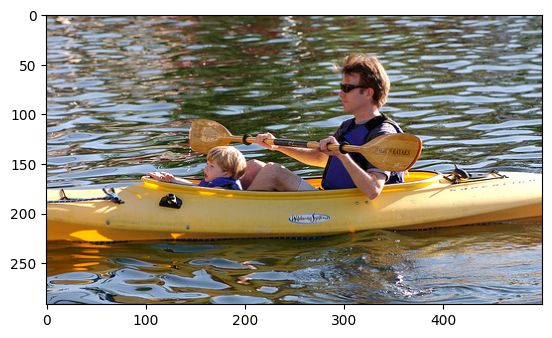

In [ ]:
generate_caption("1028205764_7e8df9a2ea.jpg")